# Self Organizing Maps

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [24]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

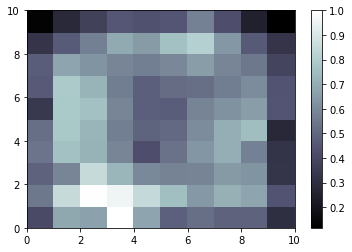

In [25]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

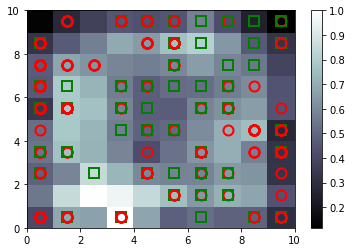

In [27]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [33]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,4)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15782089.0
15796569.0
15805212.0
15785339.0
15716276.0
15802071.0
15790630.0
15803682.0
15770406.0
15794868.0
15762392.0
15812470.0


---
# SimpSOM

In [2]:
import pandas as pd
import simpsom as sps
from sklearn.cluster import KMeans
import numpy as np

Periodic Boundary Conditions active.
The weights will be initialized with PCA.
The map will be trained with the batch algorithm.
Training SOM... done!


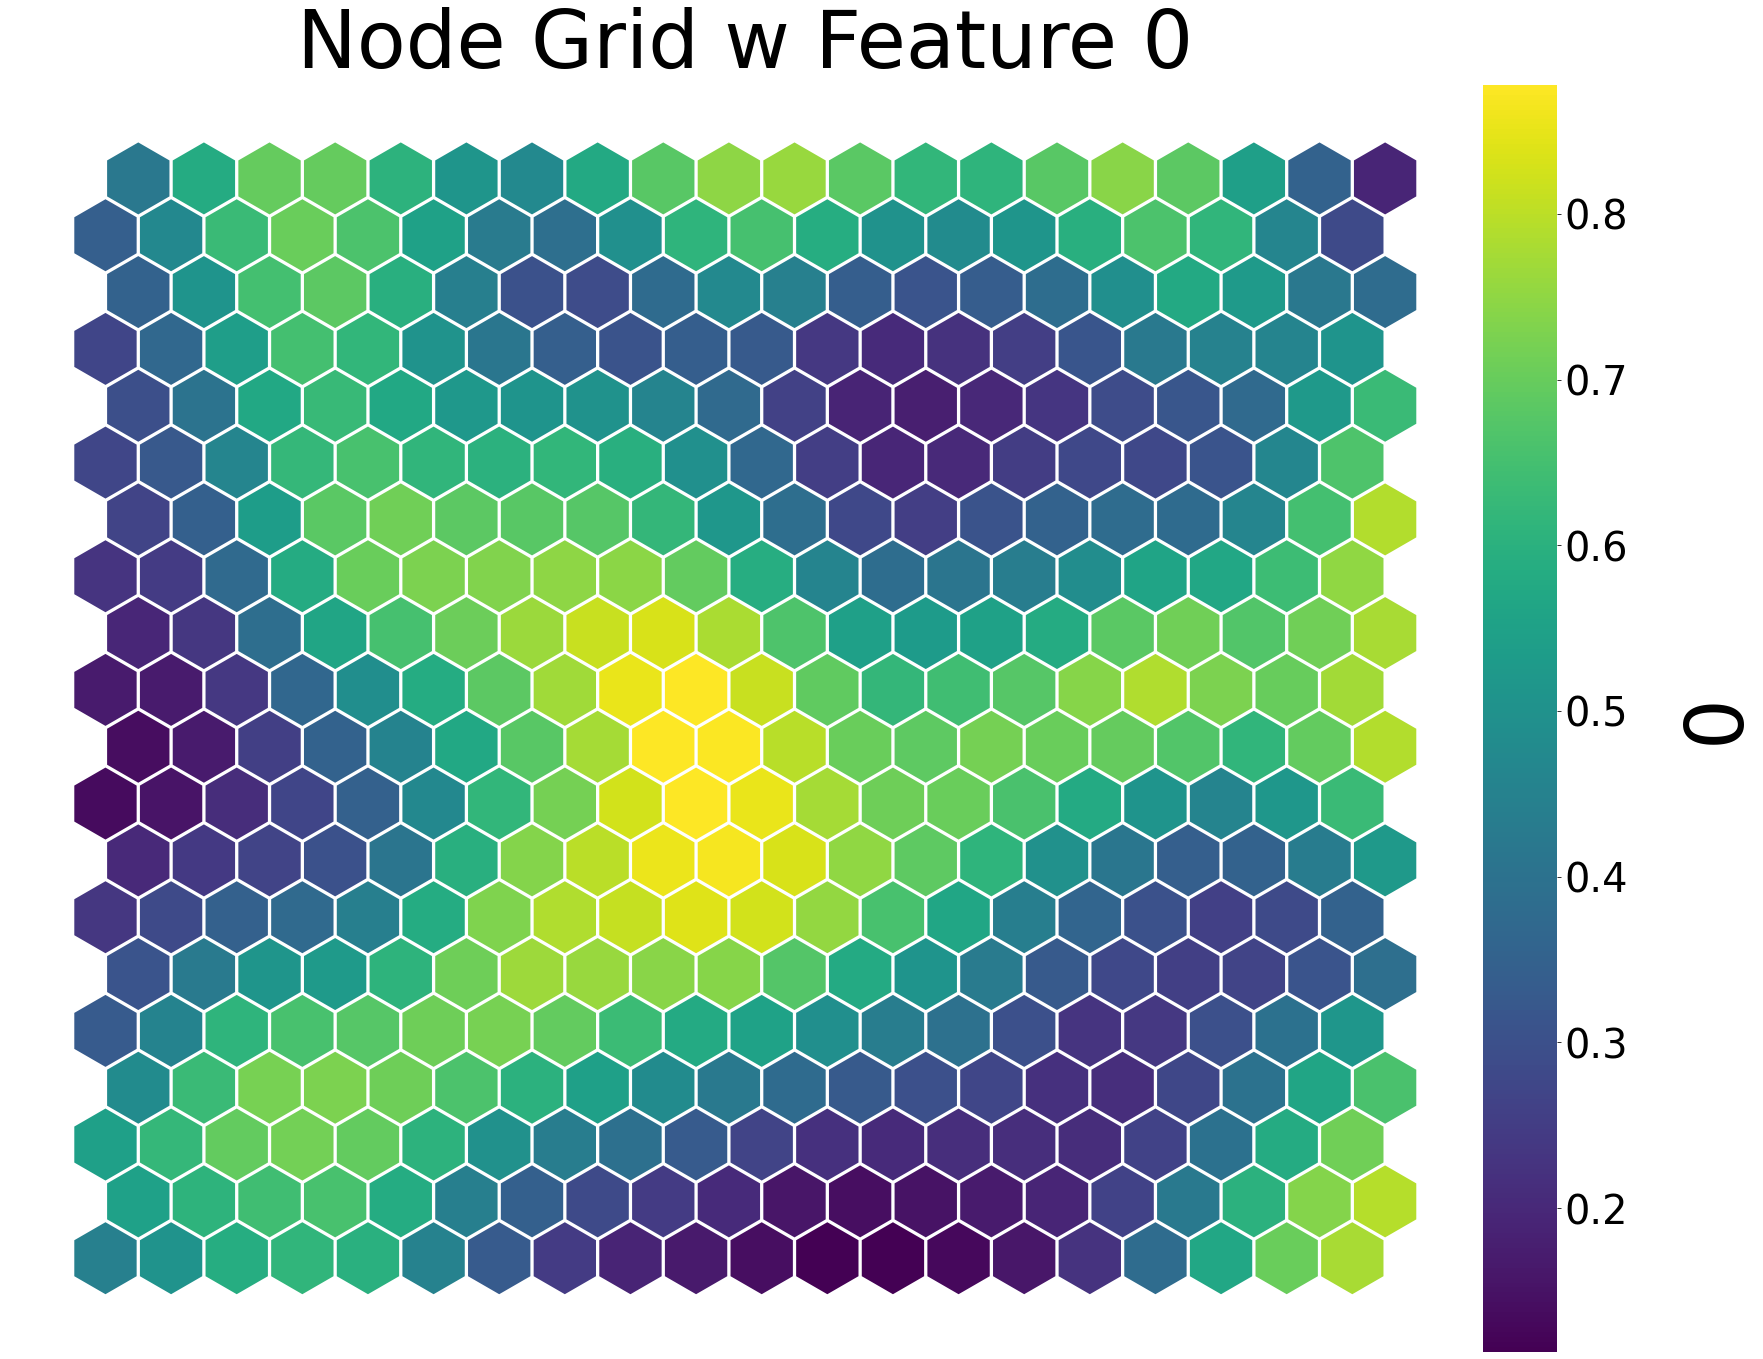

In [6]:
net = sps.SOMNet(20, 20, X, PBC=True)
net.train(start_learning_rate=0.4, epochs=1000)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

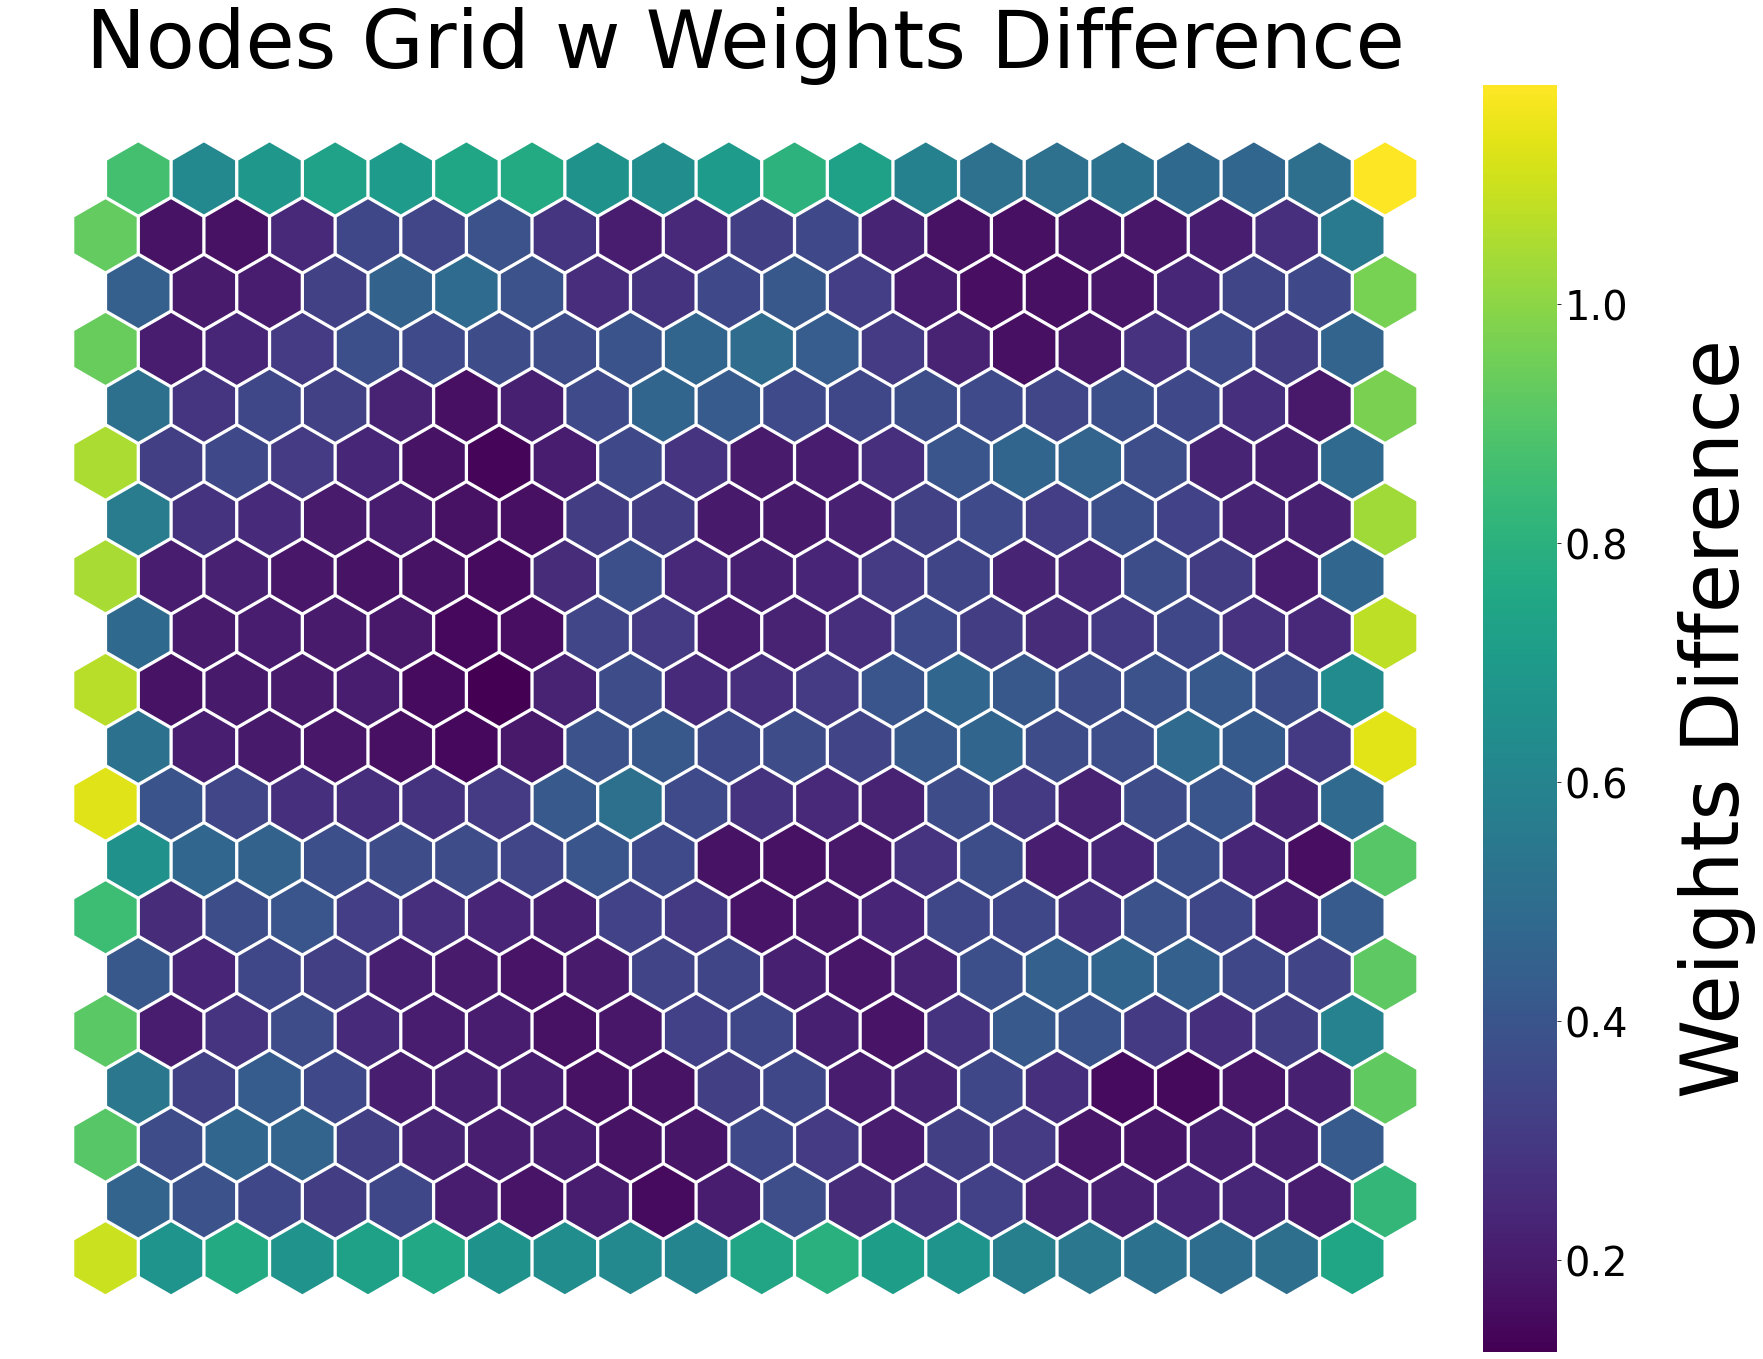

In [21]:
w_graph = net.diff_graph()

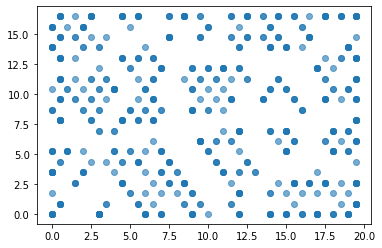

In [22]:
#Project the datapoints on the new 2D network map.
d_graph = np.array(net.project(X))
plt.scatter(graph.T[0],graph.T[1],alpha=0.6)
plt.show()

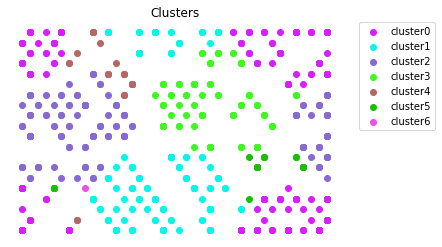

[[1,
  2,
  4,
  5,
  7,
  10,
  11,
  12,
  13,
  16,
  20,
  25,
  27,
  29,
  30,
  33,
  34,
  37,
  43,
  46,
  48,
  55,
  57,
  59,
  61,
  63,
  65,
  69,
  73,
  74,
  80,
  82,
  86,
  93,
  94,
  96,
  98,
  99,
  100,
  103,
  106,
  112,
  115,
  117,
  118,
  119,
  122,
  129,
  131,
  133,
  135,
  137,
  138,
  141,
  143,
  145,
  146,
  147,
  149,
  158,
  161,
  162,
  163,
  167,
  172,
  176,
  177,
  178,
  182,
  191,
  195,
  196,
  199,
  200,
  201,
  204,
  208,
  213,
  214,
  215,
  219,
  222,
  223,
  228,
  230,
  231,
  233,
  235,
  236,
  237,
  242,
  245,
  246,
  247,
  248,
  252,
  255,
  264,
  265,
  266,
  267,
  270,
  274,
  278,
  285,
  286,
  289,
  291,
  293,
  296,
  298,
  299,
  300,
  304,
  305,
  306,
  308,
  309,
  312,
  313,
  318,
  320,
  322,
  324,
  325,
  327,
  343,
  347,
  352,
  355,
  358,
  360,
  362,
  369,
  373,
  376,
  378,
  379,
  380,
  385,
  387,
  388,
  393,
  394,
  399,
  402,
  407,
  408,
  411,


<Figure size 432x288 with 0 Axes>

In [18]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, clus_type='qthresh', show=True)	